## Notebook 7: Statistics

A necessary aspect of working with data is the ability to describe, summarize, and represent data visually.

Descriptive statistics is about describing and summarizing data. It uses two main approaches:
<ul>
    <li> The quantitative approach describes and summarizes data numerically. </li>
    <li> The visual approach illustrates data with charts, plots, histograms, and other graphs.</li>
</ul>


You’ll learn about the following types of measures in descriptive statistics:

<ul>
    <li>Central tendency tells you about the centers of the data. Useful measures include the mean, median, and mode.</li>
    <li>Variability tells you about the spread of the data. Useful measures include variance and standard deviation.</li>
    <li>Correlation or joint variability tells you about the relation between a pair of variables in a dataset. Useful measures include covariance and the correlation coefficient.</li>
</ul>

In [1]:
from collections import Counter
import math
import matplotlib.pyplot as plt


In [2]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


In [3]:
friend_counts = Counter(num_friends)
print(friend_counts)

Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})


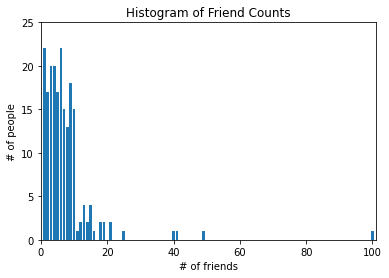

In [4]:
def make_friend_counts_histogram():
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()
make_friend_counts_histogram()

In [5]:
sorted_values=sorted(num_friends)
print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("smallest value", sorted_values[0] )
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2] )

num_points 204
largest value 100
smallest value 1
smallest value 1
second_smallest_value 1
second_largest_value 49


### Central Tendencies and Dispersion(Variability)

In [6]:
# from linear_algebra notebook
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

# Functions for statisticial notions
def mean(x):
    """ gives notion where our data is centered."""
    return sum(x) / len(x)

def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [7]:
print("mean(num_friends)", mean(num_friends))
print("median(num_friends)", median(num_friends))
print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print("quantile(num_friends, 0.50)", quantile(num_friends, 0.50))
print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
print("mode(num_friends)", mode(num_friends))
print("data_range(num_friends)", data_range(num_friends))
print("variance(num_friends)", variance(num_friends))
print("standard_deviation(num_friends)", standard_deviation(num_friends))
print("interquartile_range(num_friends)", interquartile_range(num_friends))

mean(num_friends) 7.333333333333333
median(num_friends) 6.0
quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 3
quantile(num_friends, 0.50) 6
quantile(num_friends, 0.75) 9
quantile(num_friends, 0.90) 13
mode(num_friends) [6, 1]
data_range(num_friends) 99
variance(num_friends) 81.54351395730716
standard_deviation(num_friends) 9.03014473623248
interquartile_range(num_friends) 6


### Correlation 

In [8]:
# A web site owner has a theory that the amount of time people spend
# on the site is related to the number of friends they have on the site

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


In [9]:
# Whereas variance measures how a single variable deviates from its mean, 
# covariance measures how two variables vary in tandem from their means
#
# dot sums up the products of corresponding pairs of elements. When corresponding
# elements of x and y are either both above their means or both below their
# means, a positive number enters the sum. When one is above its mean and the other
# below, a negative number enters the sum. Accordingly, a “large” positive covariance
# means that x tends to be large when y is large and small when y is small. A “large”
# negative covariance means the opposite—that x tends to be small when y is large and
# vice versa. A covariance close to zero means that no such relationship exists.

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

#The correlation is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation).

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [10]:
print("covariance(num_friends, daily_minutes)", covariance(num_friends, daily_minutes))
print("correlation(num_friends, daily_minutes)", correlation(num_friends, daily_minutes))


covariance(num_friends, daily_minutes) 22.425435139573064
correlation(num_friends, daily_minutes) 0.24736957366478218


In [11]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [12]:
print("covariance(num_friends_good, daily_minutes_good)", covariance(num_friends_good, daily_minutes_good))
print("correlation(num_friends_good, daily_minutes_good)", correlation(num_friends_good, daily_minutes_good))

covariance(num_friends_good, daily_minutes_good) 35.45625006096666
correlation(num_friends_good, daily_minutes_good) 0.5736792115665573


Simpson’s Paradox: correlations can be misleading when confounding variables are ignored.

In [13]:
#A correlation of zero indicates that there is no linear relationship between the two
#variables. However, there may be other sorts of relationships.
x1 = [-2, -1, 0, 1, 2]
y1 = [ 2, 1, 0, 1, 2]
print("correlation(x1, y1)", correlation(x1, y1))

correlation(x1, y1) 0.0


## Using Libraries


<ul>
   <li> <span  style="color:DodgerBlue;">Python’s statistics</span> is a built-in Python library for descriptive statistics. You can use it if your datasets are not too large or if you can’t rely on importing other libraries.</li>
   <li><span  style="color:DodgerBlue;">NumPy</span> is a third-party library for numerical computing, optimized for working with single- and multi-dimensional arrays. Its primary type is the array type called ndarray. This library contains many routines for statistical analysis.</li>
   <li><span  style="color:DodgerBlue;">SciPy</span>  is a third-party library for scientific computing based on NumPy. It offers additional functionality compared to NumPy, including scipy.stats for statistical analysis.</li>
   <li><span  style="color:DodgerBlue;">Pandas</span> is a third-party library for numerical computing based on NumPy. It excels in handling labeled one-dimensional (1D) data with Series objects and two-dimensional (2D) data with DataFrame objects.</li>
   <li><span  style="color:DodgerBlue;">Matplotlib</span> is a third-party library for data visualization. It works well in combination with NumPy, SciPy, and Pandas.</li>
</ul>



In [14]:
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [15]:
x = [8.0, 1, 2.5, 4, 28.0]
# In data science, missing values are common, and you’ll often replace them with nan.
# You can use one of  float('nan') ,    math.nan,     np.nan

x_with_nan = [8.0, 1, 2.5, np.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [16]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
print(y)
print (y_with_nan)


[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]


In [17]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(z)
print(z_with_nan)

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [18]:
#mean
print("statistics.mean(x)", statistics.mean(x) )
print("statistics.mean(x_with_nan)", statistics.mean(x_with_nan) )

print( "np.mean(y)",np.mean(y) )
print( "y.mean()",y.mean() )

print( "np.mean(y_with_nan)",np.mean(y_with_nan) )
print( "y_with_nan.mean()",y_with_nan.mean() )

print("np.nanmean(y_with_nan)",np.nanmean(y_with_nan))

print("z.mean()", z.mean())
print("z_with_nan.mean()", z_with_nan.mean())




statistics.mean(x) 8.7
statistics.mean(x_with_nan) nan
np.mean(y) 8.7
y.mean() 8.7
np.mean(y_with_nan) nan
y_with_nan.mean() nan
np.nanmean(y_with_nan) 8.7
z.mean() 8.7
z_with_nan.mean() 8.7


In [19]:
# Weighted Mean

x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print("wmean ",wmean)

y, z, w = np.array(x), pd.Series(x), np.array(w)
print("np.average(y, weights=w) ",np.average(y, weights=w))
print("np.average(z, weights=w) ",np.average(z, weights=w))


wmean  6.95
np.average(y, weights=w)  6.95
np.average(z, weights=w)  6.95


In [20]:
# median 
print("statistics.median(x) ",statistics.median(x))
print("np.median(y) ",np.median(x))
print("z.median( ",z.median() )
print("scipy.median(x) ",scipy.median(x))

statistics.median(x)  4
np.median(y)  4.0
z.median(  4.0
scipy.median(x)  4.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  """


In [21]:
# verience
print("statistics.variance(x) ",statistics.variance(x))
print("np.var(y, ddof=1) ",np.var(y, ddof=1))
print("z.var(ddof=1) ",z.var(ddof=1))



statistics.variance(x)  123.2
np.var(y, ddof=1)  123.19999999999999
z.var(ddof=1)  123.19999999999999


In [22]:
# Standard Deviation
print("statistics.stdev(x) ",statistics.stdev(x))
print("np.std(y, ddof=1) ",np.std(y, ddof=1) )
print("z.std(ddof=1) ",z.std(ddof=1) )


statistics.stdev(x)  11.099549540409287
np.std(y, ddof=1)  11.099549540409285
z.std(ddof=1)  11.099549540409285


In [23]:
# Skewness
# Usually, negative skewness values indicate that there’s a dominant tail on the left side.print.
# Positive skewness values correspond to a longer or fatter tail on the right side.
# If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.
x = [8.0, 1, 2.5, 4, 28]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x)* n / ((n - 1) * (n - 2) * std_**3))
print("v ",skew_)

y= np.array(x)
print("scipy.stats.skew(y, bias=False) ", scipy.stats.skew(y, bias=False) )

z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print("z.skew() ", z.skew() )
print("z_with_nan.skew() ", z_with_nan.skew() )

v  1.9470432273905929
scipy.stats.skew(y, bias=False)  1.9470432273905927
z.skew()  1.9470432273905924
z_with_nan.skew()  1.9470432273905924


In [24]:
# Percentiles
# The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset 
# are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value
# Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y= np.array(x)
#print( "statistics.quantiles(x, n=2) ", statistics.quantiles(x, n=2) )
#print( "statistics.quantiles(x, n=4, method='inclusive') ", statistics.quantiles(x, n=4, method='inclusive') )

print ("np.percentile(y, [25, 50, 75]) ", np.percentile(y, [25, 50, 75]))
print ("np.percentile(y, 5) ", np.percentile(y, 5))
print ("np.percentile(y, 95) ", np.percentile(y, 95))

print ("np.quantile(y, [0.25, 0.50, 0.75]) ", np.quantile(y, [0.25, 0.50, 0.75]))
print ("np.quantile(y, 0.5)) ", np.quantile(y, 0.5))
print ("np.quantile(y, 0.95) ", np.quantile(y, 0.95))

z= pd.Series(y)

print ("z.quantile([0.25, 0.50, 0.75]) ", z.quantile( [0.25, 0.50, 0.75]))
print ("z.quantile( 0.5)) ", z.quantile(0.5))
print ("z.quantile(0.95) ", z.quantile(0.95))


np.percentile(y, [25, 50, 75])  [ 0.1  8.  21. ]
np.percentile(y, 5)  -3.44
np.percentile(y, 95)  34.919999999999995
np.quantile(y, [0.25, 0.50, 0.75])  [ 0.1  8.  21. ]
np.quantile(y, 0.5))  8.0
np.quantile(y, 0.95)  34.919999999999995
z.quantile([0.25, 0.50, 0.75])  0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64
z.quantile( 0.5))  8.0
z.quantile(0.95)  34.919999999999995


In [25]:
# Summary of Descriptive Statistics
# SciPy and Pandas offer useful routines to quickly get descriptive statistics with a single function or method call.

result = scipy.stats.describe(y, ddof=1, bias=False)
print(result)
print(result.nobs)

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)
9


In [26]:
result = z.describe()
print(result)
print(result['count'])

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64
9.0


### Measures of Correlation Between Pairs of Data

<ul> <li>Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.</li>
    <li>Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.</li>
    <li>Weak or no correlation exists if there is no such apparent relationship.</li>
</ul>

In [27]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)


<function matplotlib.pyplot.show>

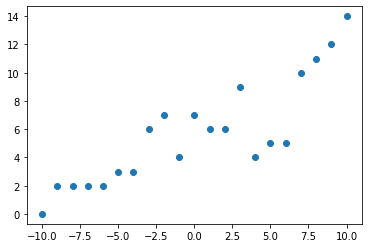

In [28]:
import matplotlib.pyplot as ptl
ptl.scatter(x,y)
plt.show

In [29]:
# Covariance: If the correlation is positive, then the covariance is positive, as well. 
# A stronger relationship corresponds to a higher value of the covariance. 
# If the correlation is negative, then the covariance is negative, as well. 
#A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.

print(np.cov(x_))
print(np.cov(y_))
print( np.cov(x_, y_))


38.5
13.914285714285711
[[38.5        19.95      ]
 [19.95       13.91428571]]


In [30]:
# Correlation Coefficient

r, p = scipy.stats.pearsonr(x_, y_)
print(r, p)
corr_matrix = np.corrcoef(x_, y_)
print(corr_matrix)

0.861950005631606 5.122760847201171e-07
[[1.         0.86195001]
 [0.86195001 1.        ]]


In [31]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979)

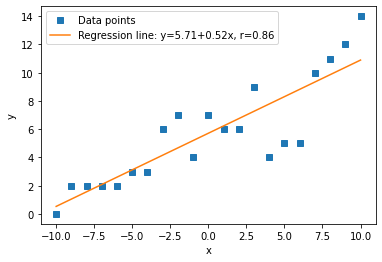

In [32]:
x = np.array(list(range(-10, 11)) )
y = np.array( [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14] )
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()



In [33]:
# Pandas DataFrames
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [34]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [35]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [36]:
df['A'].mean()

6.2

In [37]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


### Some extra plots


[-1.1046166  -0.03093626  1.57886519 -0.79550055 -0.56643985 -0.30769128
  0.26902407  0.52491786  1.26741165  0.49949823]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


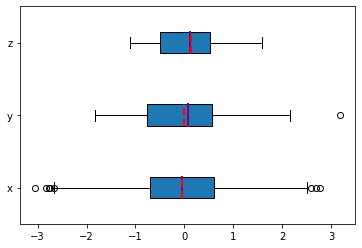

In [38]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)
print (z)

fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()



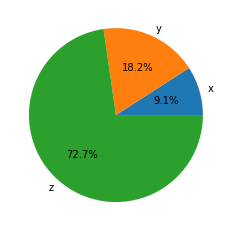

In [39]:
x, y, z = 128, 256, 1024
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()


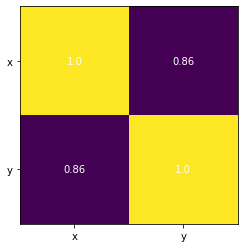

In [40]:
x = np.array(list(range(-10, 11)) )
y = np.array( [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14] )

#matrix = np.cov(x, y).round(decimals=2)
matrix = np.corrcoef(x, y).round(decimals=2)

fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()
